In [1]:
from qiskit import IBMQ

# # Load Account and Choose Backend
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
name = 'ibmqx2'
backend = provider.get_backend(name) # ibmq_16_melbourne, ibmq_vigo, ibmq_london, ibmq_burlington, ibmq_essex, ibmqx2, ibmq_ourense

In [2]:
import warnings
import sys
sys.path.insert(1, '../../Scripts')
sys.path.insert(1, '../../QREM')
from expfuncs import *
warnings.filterwarnings('ignore')

interested_qubits = [2,1]
itr = 16
QDT_correlated = True
noise_file_address = 'Noise/'
all_methods_data(interested_qubits,backend, itr, QDT_correlated, file_address = noise_file_address)

Our method
Job Status: job has successfully run
Qiskit Method
Job Status: job has successfully run
QDT, correlation =  True
Number of Circuits needed is  36
Job Status: job has successfully run
Write data for standard Bayesian


In [3]:
# Collect Grover Data
file_address = 'T1/'
Groverexp(backend,file_address =file_address)

Grover circuit depth is  23
Job Status: job has successfully run


Standard Bayesian filter
Our Filter
Qubit 2
Given Lambdas [0.9498 0.9582]
Final Accepted Posterior Lambdas
M: 2.76667 Index: 9308 pi_obs = 24.3698 pi_Q(prior) = 8.80837
Accepted Number N: 14681, fraction 0.367
I(pi^post_Lambda) = 1
Posterior Lambda Mean [0.91611316 0.91705749]
Posterior Lambda Mode [0.93691326 0.94626708]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.00030549
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf


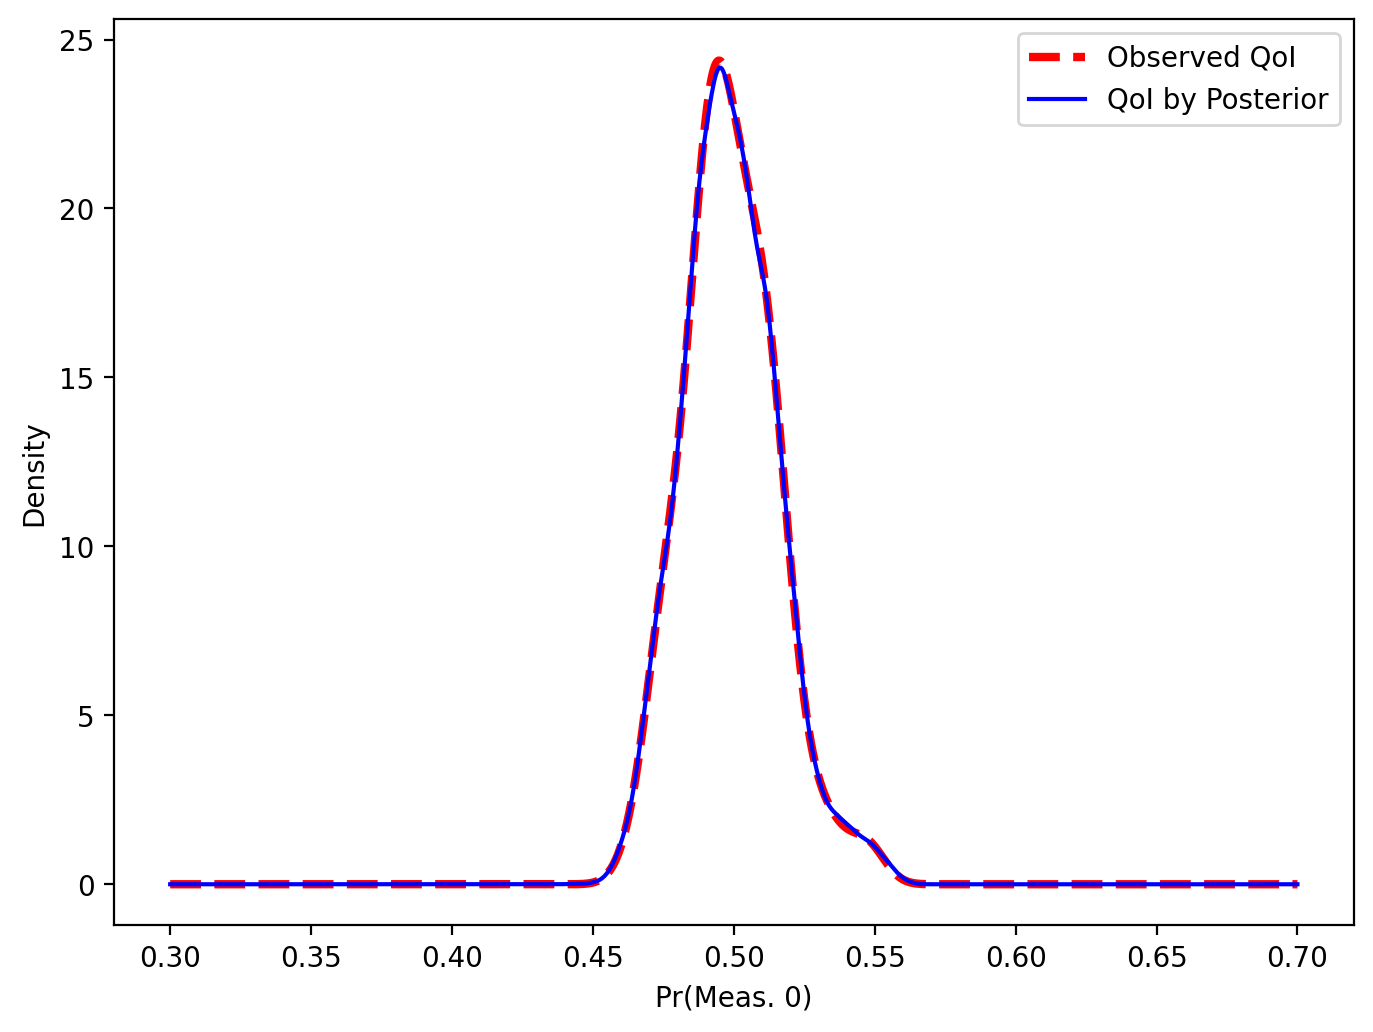

Qubit 1
Given Lambdas [0.9692 0.9516]
Final Accepted Posterior Lambdas
M: 3.91108 Index: 37880 pi_obs = 27.7497 pi_Q(prior) = 7.09514
Accepted Number N: 10347, fraction 0.259
I(pi^post_Lambda) = 1
Posterior Lambda Mean [0.93445697 0.89340731]
Posterior Lambda Mode [0.97983572 0.90809426]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.0011162
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf


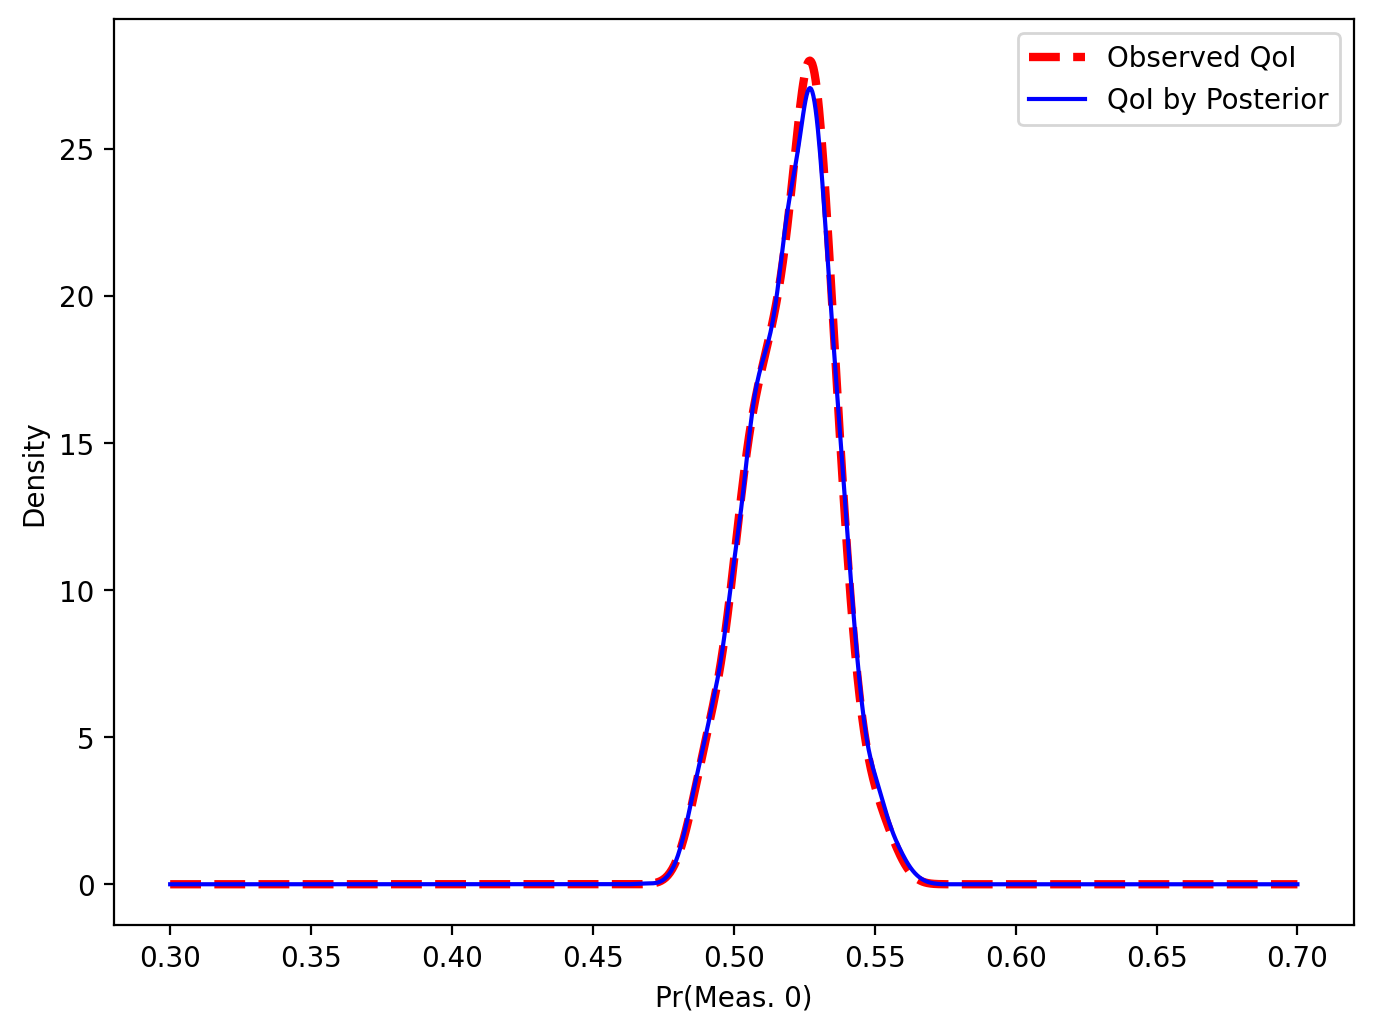

Qiskit filter
QDT filter


In [4]:
# Create Filters
# Run R file first!
our_filter, qiskit_filter, QDT_filter, SB_filter = create_filters(interested_qubits,QDT_correlated, show_denoised = False, from_file = False,file_address = noise_file_address)

In [5]:
# Read Grover data
with open(file_address + 'Count_Grover.csv', mode='r') as sgm:
    reader = csv.reader(sgm)
    temp_counts = {}
    for row in reader:   
        temp_counts[row[0]] = int(row[1])
real_counts = {}
for key in temp_counts.keys():
    real_counts[key[0:2]] = temp_counts[key]

In [6]:
# Filtering
mean_counts = our_filter.filter_mean(real_counts)
mode_counts = our_filter.filter_mode(real_counts)
qis_counts = qiskit_filter.apply(real_counts)
QDT_counts = QDT_filter.filter(real_counts)
sbmean_counts = SB_filter.filter_mean(real_counts)
sbmode_counts = SB_filter.filter_mode(real_counts)

In [7]:
data_shots = 8192
print('Real Device',real_counts['11']/data_shots)
print('Qiskit Method',qis_counts['11']/data_shots)
print('QDT',QDT_counts['11']/data_shots)
print('SB Mean',sbmean_counts['11']/data_shots)
print('SB Mode',sbmode_counts['11']/data_shots)
print('Mean',mean_counts['11']/data_shots)
print('Mode',mode_counts['11']/data_shots)

Real Device 0.7095947265625
Qiskit Method 0.7522600264815531
QDT 0.7386474609375
SB Mean 0.9371337890625
SB Mode 0.874267578125
Mean 0.8587646484375
Mode 0.820068359375


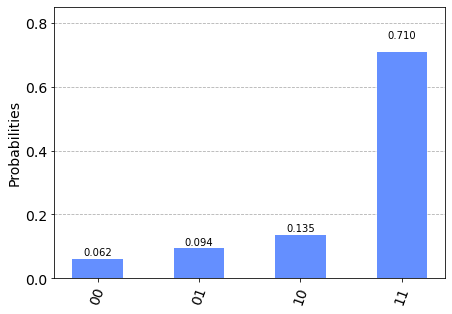

In [8]:
from qiskit.visualization import plot_histogram
plot_histogram(real_counts)

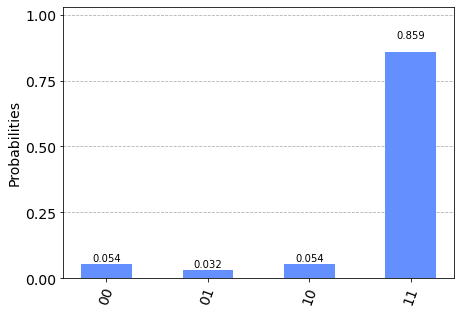

In [9]:
plot_histogram(mean_counts)

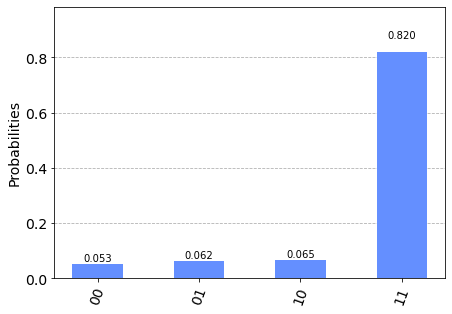

In [10]:
plot_histogram(mode_counts)

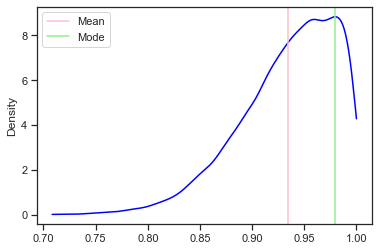

In [11]:
import scipy.stats as ss
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt 

data = our_filter.post['Qubit1'][:,0]
density = ss.gaussian_kde(data)
xline = np.linspace(min(data),max(data),200)
plt.plot(xline,density(xline),color='Blue')
plt.axvline(x=our_filter.mean()['Qubit1'][0],color='Pink',label = 'Mean')
plt.axvline(x=our_filter.mode()['Qubit1'][0],color='lightgreen',label = 'Mode')
# plt.xlabel('Pr(Meas. 11)')
plt.ylabel('Density')
# plt.title('Denoised Pr(Meas. 11)')
plt.legend()
plt.show()

In [ ]:
data = our_filter.post['Qubit2'][:,0]
density = ss.gaussian_kde(data)
xline = np.linspace(min(data),max(data),200)
plt.plot(xline,density(xline),color='Blue')
plt.axvline(x=our_filter.mean()['Qubit2'][0],color='Pink',label = 'Mean')
plt.axvline(x=our_filter.mode()['Qubit2'][0],color='lightgreen',label = 'Mode')
# plt.xlabel('Pr(Meas. 11)')
plt.ylabel('Density')
# plt.title('Denoised Pr(Meas. 11)')
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
our_q1 = pd.DataFrame(our_filter.post['Qubit1'],columns=['P0','P1'])
sns.jointplot(x="P0", y="P1", data=our_q1, kind="kde", xlim=(0.6,1.02), ylim=(0.6,1.02)).set_axis_labels('$1 - \epsilon_{m0,1}$', '$1 - \epsilon_{m1,1}$')